### Exercice semaine 10 data science
- Date limite de soumission: Vendredi 2 juin à 10 H
- Nous travaillerons sur la base des données de reconnaissance des nombres (base MNIST)
- Utiliser ce nootebook pour répondre aux questions
- La base des données en fichier compressé est disponible à l'adresse URL: https://github.com/pefura/IFPERA-data-science/blob/main/mnist-original.mat.zip 
OU à l'adresse URL: https://drive.google.com/file/d/1wlAi66jIkxzCy57hH15-SxdMQ7gvmmEu/view?usp=sharing
- Chaque question est notée sur 10 points

In [1]:
# Installer scipy avec: pip install scipy
# Importer loadmat comme ci-dessous
from scipy.io import loadmat

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Exécuter cette cellule: url est le chémin du fichier dans votre ordinateur. Vous devez remplacer l'url ci-dessous 
# par l'adresse exacte du fichier décompressé dans votre ordinateur. 

url = "C:/Users/DDD/Downloads/mnist-original.mat/mnist-original.mat"
mnist = loadmat(url)
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]
print("shape of mnist_data:", mnist_data.shape)
print("shape of mnist_label:", mnist_label.shape)

shape of mnist_data: (70000, 784)
shape of mnist_label: (70000,)


In [6]:
# Imprimer quelques exemples d'étiquettes (y)
mnist_label

array([0., 0., 0., ..., 9., 9., 9.])

In [62]:
pd.DataFrame(mnist_label).value_counts(normalize = True)

1.0    0.112529
7.0    0.104186
3.0    0.102014
2.0    0.099857
9.0    0.099400
0.0    0.098614
6.0    0.098229
8.0    0.097500
4.0    0.097486
5.0    0.090186
Name: proportion, dtype: float64

In [9]:
# Imprimer quelques exemples des caractéristiques(X)
mnist_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

1. Question numéro 1: redimensionner les images au format 28 x 28 x 1 (10 pts).
- NB: Cette base contient des images transformées en valeurs de pixel et consignées dans les tableaux numpy. nous devons refaire les dimensions des images. l'index 1 de la forme de "mnist_data" correspond aux dimensions des images. 
- Nommer la nouvelle base avec redimensionnement data et montrer la preuve de la reusite du changement de forme.

In [12]:
data = mnist_data.reshape(len(mnist_data), 28, 28)
data.shape

(70000, 28, 28)

2. Question numéro 2: Imprimer à l'écran la première et la dernière image de data et donner la correspondance de ces images selon vous.

First image: AxesImage(size=(28, 28))


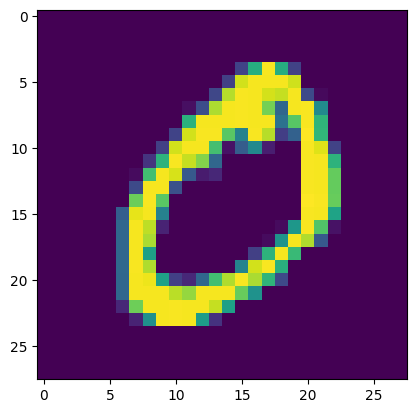

In [19]:
import matplotlib.pyplot as plt
print("First image:", plt.imshow(data[0]))

Last image: AxesImage(size=(28, 28))


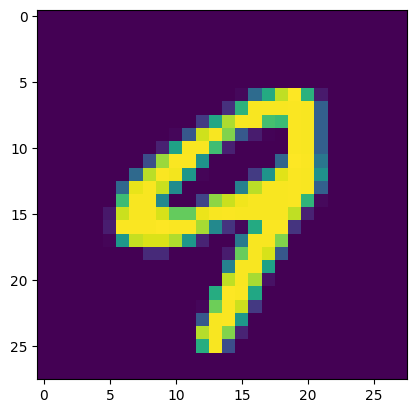

In [21]:
print("Last image:", plt.imshow(data[len(data)-1]))

3. Question numéro 3: Imprimer à l'écran la première et la dernière étiquette. Y a t'il correspondance avec ce que vous avez indiqué ci-dessus?

In [22]:
print("First label:", int(mnist_label[0]))
print("Last label:", int(mnist_label[len(mnist_label)-1]))

First label: 0
Last label: 9


4. Séparer le jeu des données en données d'entraînement et données test. Le jeu d'entraînement doit contenir 63.000 images.
- Vous êtes prier de fixer le générateur alétaoire à 0. 

In [23]:
from sklearn.model_selection import train_test_split

In [66]:
X = data.copy()
y = mnist_label.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.10, stratify=y, random_state=0)
X_train.shape

(63000, 28, 28)

In [67]:
y_train.shape

(63000,)

5. Quelle est la valeur de l'image en 10 ème position du train set? 

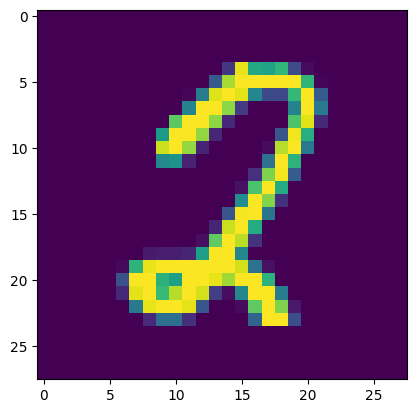

In [25]:
plt.imshow(X_train[9])

6. Déterminer le nombre de classes à prédire ainsi que la forme des images en sachant que les images doivent être en noir et blanc

In [34]:
print("classes and values:", pd.DataFrame(mnist_label).value_counts())
print("total number of classes:",len(pd.DataFrame(mnist_label).value_counts()))

classes and values: 1.0    7877
7.0    7293
3.0    7141
2.0    6990
9.0    6958
0.0    6903
6.0    6876
8.0    6825
4.0    6824
5.0    6313
Name: count, dtype: int64
total number of classes: 10


In [35]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

7. Pretraitement des données
- Normaliser les images
- Assurez-vous que la forme des images est (28,28,1)

In [54]:
# Scale images to the [0, 1] range
X_train = X_train.astype("float32")/ 255
X_test = X_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

X_train shape: (63000, 28, 28, 1)
63000 train samples
7000 test samples


In [49]:
print("X_test shape:", X_test.shape)

X_test shape: (7000, 28, 28, 1)


8. Faire une transformation one hot sur les classes (y_train) en utilisant la méthode to_categorical de keras

In [50]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [69]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [70]:
y_train.shape

(63000, 10)

9. Entraîner un modèle de réseau de neurones convolutionnels et tracer les courbes de a fonction de pette et de l'exactitude (accuracy).  

In [57]:
from tensorflow.keras import layers

In [61]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [71]:
batch_size = 128
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/10
394/394 [==============================] - 27s 60ms/step - loss: 1.3171 - accuracy: 0.8320 - val_loss: 0.1111 - val_accuracy: 0.9659
Epoch 2/10
394/394 [==============================] - 25s 63ms/step - loss: 0.1949 - accuracy: 0.9417 - val_loss: 0.0776 - val_accuracy: 0.9778
Epoch 3/10
394/394 [==============================] - 20s 51ms/step - loss: 0.1427 - accuracy: 0.9564 - val_loss: 0.0598 - val_accuracy: 0.9813
Epoch 4/10
394/394 [==============================] - 20s 52ms/step - loss: 0.1220 - accuracy: 0.9631 - val_loss: 0.0573 - val_accuracy: 0.9829
Epoch 5/10
394/394 [==============================] - 20s 50ms/step - loss: 0.1092 - accuracy: 0.9669 - val_loss: 0.0539 - val_accuracy: 0.9839
Epoch 6/10
394/394 [==============================] - 20s 50ms/step - loss: 0.1029 - accuracy: 0.9683 - val_loss: 0.0589 - val_accuracy: 0.9831
Epoch 7/10
394/394 [==============================] - 20s 51ms/step - loss: 0.0924 - accuracy: 0.9721 - val_loss: 0.0498 - val_accuracy:

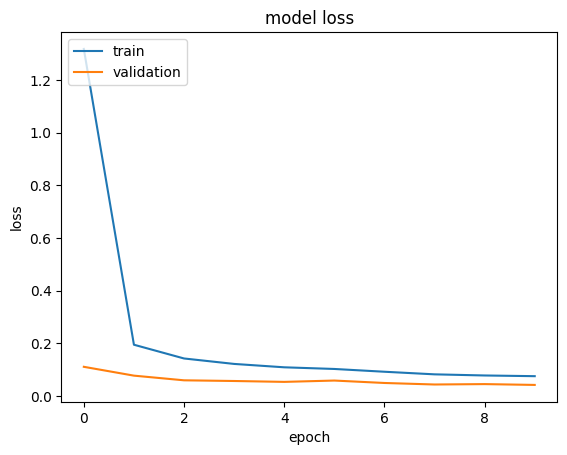

In [72]:
def plot_hist_loss(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()
plot_hist_loss(history)

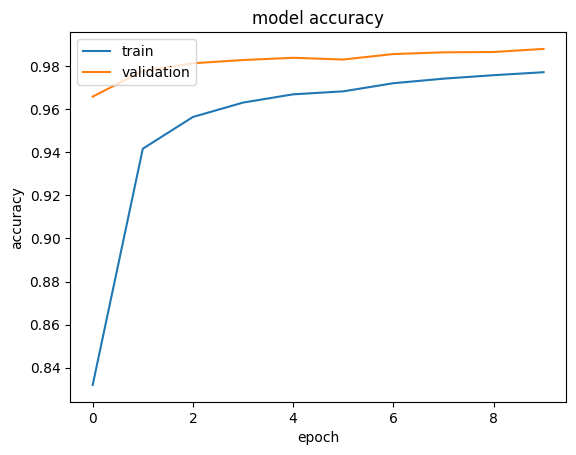

In [73]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()
plot_hist(history)

10. Evaluer le modèle sur les données test

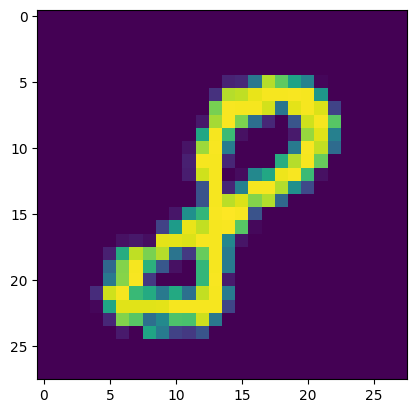

In [79]:
plt.imshow(X_test[2])

10: Predire et Evaluer le modèle sur les données test

In [74]:
pd.DataFrame(model.predict(X_test))

219/219 [==============================] - 1s 4ms/step


,0,1,2,3,4,5,6,7,8,9
0,7.053412e-09,9.479771e-16,6.699877e-13,1.257679e-13,3.283470e-10,1.662926e-09,1.000000e+00,2.406355e-14,4.106708e-09,9.747761e-13
1,7.040106e-08,2.729165e-11,7.434469e-09,7.715746e-13,1.070303e-10,2.173565e-08,9.999996e-01,8.579213e-13,2.179257e-07,7.724353e-11
2,3.967615e-08,2.888542e-08,4.257206e-04,1.104554e-05,3.634053e-07,4.212540e-07,1.031394e-07,5.119394e-09,9.995129e-01,4.936795e-05
3,9.861515e-09,2.321052e-07,2.819857e-06,6.962982e-05,2.282486e-08,1.986608e-05,5.958756e-08,9.129821e-10,9.999042e-01,3.250663e-06
4,2.509458e-06,4.908479e-08,1.114493e-05,1.756775e-01,4.159443e-05,1.034674e-01,3.115935e-11,1.202232e-09,2.694842e-03,7.181050e-01
...,...,...,...,...,...,...,...,...,...,...
6995,3.366645e-15,2.426226e-12,1.197151e-09,1.000000e+00,4.446863e-15,5.481679e-09,9.007757e-22,2.052263e-14,9.606275e-12,6.254228e-11
6996,8.784094e-16,2.366023e-14,4.711842e-12,1.000000e+00,2.609115e-15,8.575827e-10,1.276994e-18,1.098875e-09,9.152843e-13,8.806243e-11
6997,1.069102e-06,9.998831e-01,9.403535e-07,2.642243e-10,2.523331e-05,1.994567e-06,8.228060e-05,3.133424e-06,1.894112e-06,3.605123e-07
6998,3.169830e-13,9.835433e-12,1.494359e-06,2.391712e-06,1.624201e-08,4.721172e-08,1.010715e-13,9.491798e-10,9.999868e-01,9.348011e-06


In [77]:
from numpy import argmax
y_pred_prob  = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

print("predictions:", y_pred)

219/219 [==============================] - 1s 4ms/step
predictions: [6 6 8 ... 1 8 6]


In [81]:
pd.DataFrame(y_pred)

,0
0,6
1,6
2,8
3,8
4,9
...,...
6995,3
6996,3
6997,1
6998,8


In [83]:
# To verify and to test
score = model.evaluate(X_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

219/219 [==============================] - 1s 4ms/step - loss: 0.0481 - accuracy: 0.9857
Test loss: 0.04810977354645729
Test accuracy: 0.9857142567634583


In [88]:
model.save('MNIST_model.h5')

In [ ]:
# To go forward
# Fanny: 1) functions in python  2) Image processing 
# Nassir: 2) functions in python 
# Cedric: Travail personnel
# Nounda: 1) Comprehension de questions

##END OF THE STORY